In [7]:
import sys, os
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *
from simulation.population_sim import LensingObservationWithSubhalos

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
# Load Gaussian mean and covariance generated in notebook `1. Euclid-Properties.ipynb`
sim_mvgauss = np.load("../../simulation/data/sim_mvgauss.npz")

In [269]:
from simulation.population_sim import SubhaloPopulation
alpha = SubhaloPopulation._alpha_calib(1e8 * M_s, 1e10 * M_s, 150, M_MW, -1.9) # alpha for conventional n_calib
f_sub = SubhaloPopulation._m_in_sub(1e13 * M_s, alpha, -1.9, 1e7 * M_s, 1e11 * M_s) / (1e13 * M_s) # corresponding f_sub
print("Sensible value for f_sub is", f_sub)

Sensible value for f_sub is 0.14976091493949886


0.292336073685
12.8516202732 165.522257295 0.292336073685 0.033304660756 -0.447065667415 0.783765501746
63
0.0729317175604


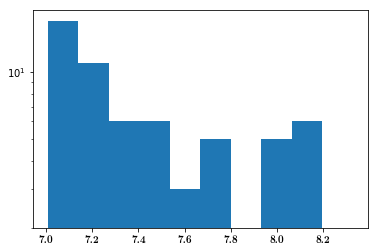

In [459]:
# Generate single lensing sample
# Fix source parameters and consider only spherical hosts

lo = LensingObservationWithSubhalos(sim_mvgauss_mean=sim_mvgauss['mean'], sim_mvgauss_cov=sim_mvgauss['cov'],
                                    M_200_sigma_v_scatter=False,   
                                    spherical_host=1,
                                    fix_source=1, 
                                    m_200_min_sub=1e7 * M_s,
                                    beta=-1.9, f_sub=0.2
)

v_min = 2.
v_max = 3.

# plt.imshow(np.log10(lo.image_poiss_psf),
#         vmin=v_min,
#         vmax=v_max,
#         cmap='gist_gray',
#         extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
#         origin="lower"
# )
# plt.colorbar()

# plt.xlabel(r"$\theta_x$ [arcsec]")
# plt.ylabel(r"$\theta_y$ [arcsec]")

13.0334300224 186.681198817 0.0888808514413 -0.336858921963 0.353216521959 78.7765779992
68
3.22392392786e-68
8.58951460859
[ 7.20404292  7.06542154  6.21367135  7.13569136  6.30803347  6.40784038
  6.31422864  6.55941765  6.2533028   6.02624652  6.27285083  6.37293963
  6.31829261  6.38704789  6.29635071  6.11021636  6.11917128  6.08620379
  6.41352679  6.29189066  6.58055433  6.48930325  6.3023592   6.10380737
  6.31940075  6.00464351  6.55188057  6.27961999  6.41337993  6.44270826
  6.77625003  6.27051374  6.19278809  6.96034657  6.02820849  6.4047756
  6.26856726  7.39758706  7.03296039  6.01898525  6.29398323  6.05848276
  8.01036536  6.34875663  6.89232431  7.29415669  6.55063674  6.07535391
  6.36327939  6.22384878  6.19191071  6.18308418  6.24337005  6.32641618
  6.52956395  6.30330605  6.62630891  6.10379135  6.02435253  7.1786244
  7.21264047  6.41538476  7.19813473  6.83544452  6.70350151  6.22755438
  6.05597682  6.06409489]
13.5367510115 260.455210021 0.977332497271 -0.054

KeyboardInterrupt: 

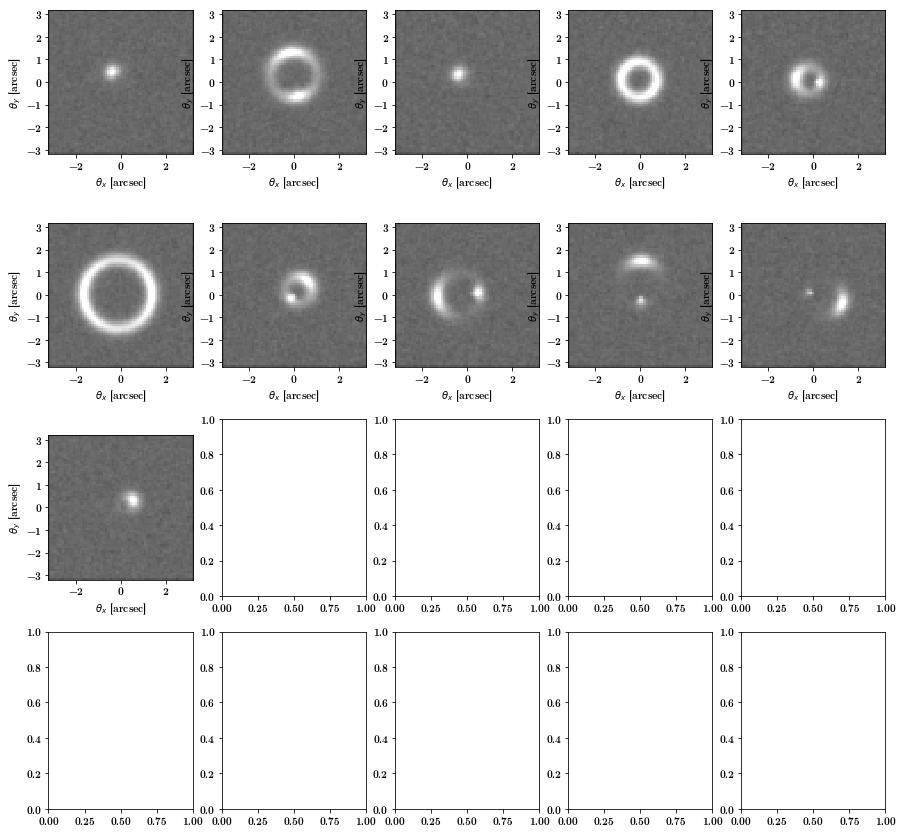

In [163]:
n_mc = 20

f, ax = plt.subplots(int(n_mc / 5), 5,figsize=(15,15))

v_min = 2.
v_max = 3.

for i_mc in range(n_mc):
    
    i_x, i_y = divmod(i_mc, 5)

    # Fix source parameters and consider only spherical hosts

    lo = LensingObservationWithSubhalos(sim_mvgauss_mean=sim_mvgauss['mean'], sim_mvgauss_cov=sim_mvgauss['cov'], 
                                       spherical_host=1,
                                       fix_source=1)

    ax[i_x, i_y].imshow(np.log10(lo.image_poiss_psf),
            vmin=v_min,
            vmax=v_max,
            cmap='gist_gray',
            extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
            origin="lower"
    )
    
    ax[i_x, i_y].set_xlabel(r"$\theta_x$ [arcsec]")
    ax[i_x, i_y].set_ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()